In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import pickle

# check GPU
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# create test samples
batch_size = 64
image_dim = 256
channel = 3
test_sample = np.random.rand(batch_size, image_dim, image_dim, channel)
print(f'number of test sample: {batch_size}\ntest sample shape: {(image_dim, image_dim, channel)}')

number of test sample: 64
test sample shape: (256, 256, 3)


In [3]:
# shared attributes
default_params_1 = {'d_model': 256,
                    'image_size': image_dim,
                    'num_layers': 6,
                    'num_classes': 10,
                    'num_heads': 8,
                    'mlp_dim': 2046
                   }
default_params_2 = {'lr': 1e-4,
                    'weight_decay': 1e-4,
                    'input_shape': test_sample.shape[1:]
}

# ViP attributes
ViP_params = {'random_features': 16,
              'kernel_transformation': 'relu'}

# patch_size -> L
patch_size_vit = [64, 32, 16, 8, 4]
patch_size_vip = [64, 32, 16, 8, 4, 2]

In [4]:
curr_dir = os.getcwd() 
parent_dir = os.path.abspath(os.path.join(curr_dir, os.pardir))
sys.path.append(parent_dir)

In [5]:
from utils import ViT_inf_time_check
vit_inf= ViT_inf_time_check(default_params_1, default_params_2, patch_size_vit, test_sample)

ViT with L=16 and 11581782 parameters
64/64 [==============================] - 1s 10ms/step
Inference Time: 1037.668
*******************************************************************************
ViT with L=64 and 9234774 parameters
64/64 [==============================] - 1s 10ms/step
Inference Time: 996.157
*******************************************************************************
ViT with L=256 and 8694102 parameters
64/64 [==============================] - 1s 10ms/step
Inference Time: 970.917
*******************************************************************************
ViT with L=1024 and 8743254 parameters
64/64 [==============================] - 1s 18ms/step
Inference Time: 1471.118
*******************************************************************************
ViT with L=4096 and 9492822 parameters
64/64 [==============================] - 7s 108ms/step
Inference Time: 7198.026
*******************************************************************************


In [6]:
from utils import ViP_inf_time_check
vip_inf = ViP_inf_time_check(default_params_1, default_params_2, ViP_params, patch_size_vip, test_sample)

ViP with L=16 and 11581782 parameters
64/64 [==============================] - 1s 11ms/step
Inference Time: 1049.997
*******************************************************************************
ViP with L=64 and 9234774 parameters
64/64 [==============================] - 1s 11ms/step
Inference Time: 1048.491
*******************************************************************************
ViP with L=256 and 8694102 parameters
64/64 [==============================] - 1s 11ms/step
Inference Time: 1083.603
*******************************************************************************
ViP with L=1024 and 8743254 parameters
64/64 [==============================] - 1s 15ms/step
Inference Time: 1290.605
*******************************************************************************
ViP with L=4096 and 9492822 parameters
64/64 [==============================] - 2s 32ms/step
Inference Time: 2358.467
*******************************************************************************
ViP with L=163

In [7]:
inf_time = [vit_inf, vip_inf]
log_file = '\d_256_relu.pkl'
log_name = '\log\inference_time' + log_file
log_path = parent_dir + log_name
with open(log_path, 'wb') as file:
    pickle.dump(inf_time, file)

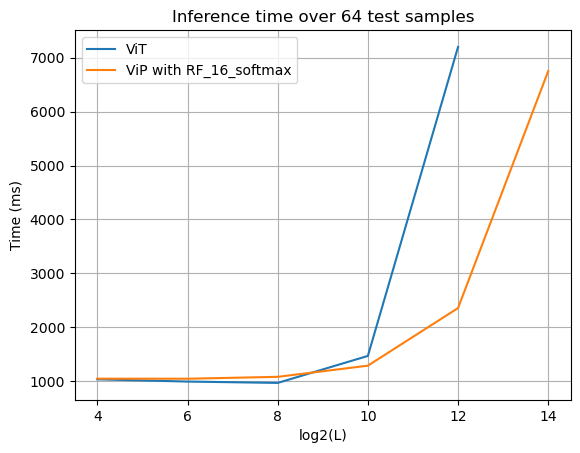

In [8]:
logL_vit = np.log2([16, 64, 256, 1024, 4096])
logL_vip = np.log2([16, 64, 256, 1024, 4096, 16384])
plt.title(f'Inference time over {batch_size} test samples')
plt.xlabel('log2(L)')
plt.plot(logL_vit, vit_inf, label='ViT')
plt.plot(logL_vip, vip_inf, label='ViP with RF_16_softmax')
plt.ylabel('Time (ms)')
plt.legend()
plt.grid()